In [1]:
from math import inf
import numpy as np
import matplotlib.pyplot as plt
import subprocess

%matplotlib inline

In [47]:
xs = -2
xe = 2
ys = -2
ye = 2
xtics = 11
ytics = 11
num_p = 4001
x,y = np.meshgrid(np.linspace(xs, xe, num_p), np.linspace(ys, ye, num_p))

inf_comp = np.array(complex(inf, inf))
nanj = np.complex128(np.nan+(np.nan)*1j)

In [48]:
z = x + y*1j
# z = points
iters = np.ones(z.shape)*np.inf

In [49]:
z = z[::-1]
print(z[0][0])

(-2+2j)


In [50]:
num_iter = 100
limit = 2
c =  -0.8 + 0.156j

for i in range(1, num_iter+2):
    z = np.square(z) + c/z
    np.nan_to_num(z, copy=False, posinf=True)
    # z = np.square(z) + c
    cond = i/(np.abs(z)>=limit)
    iters = np.minimum(cond, iters)

<ipython-input-50-a5f725d21b3d>:6: RuntimeWarning: divide by zero encountered in true_divide
  z = np.square(z) + c/z
<ipython-input-50-a5f725d21b3d>:9: RuntimeWarning: divide by zero encountered in true_divide
  cond = i/(np.abs(z)>=limit)
<ipython-input-50-a5f725d21b3d>:6: RuntimeWarning: overflow encountered in square
  z = np.square(z) + c/z
<ipython-input-50-a5f725d21b3d>:9: RuntimeWarning: overflow encountered in absolute
  cond = i/(np.abs(z)>=limit)
<ipython-input-50-a5f725d21b3d>:6: RuntimeWarning: invalid value encountered in square
  z = np.square(z) + c/z
<ipython-input-50-a5f725d21b3d>:6: RuntimeWarning: overflow encountered in true_divide
  z = np.square(z) + c/z


In [51]:
print(np.max(iters))
print(np.min(iters))
print(np.isnan(z[500][500]))

print(np.abs(z[0][0])>2)

20.0
1.0
False
True


In [52]:
rangex = np.linspace(0, num_p, xtics).tolist()
rangex = [int(x) for x in rangex]
rangey = np.linspace(0, num_p, ytics).tolist()
rangey = [int(y) for y in rangey]
tics_x = np.linspace(xs, xe, xtics).tolist()
tics_x = [round(x, 2) for x in tics_x]
tics_y = np.linspace(ys, ye, ytics).tolist()
tics_y = [round(y, 2) for y in tics_y]

(-0.5, 4000.5, 4000.5, -0.5)

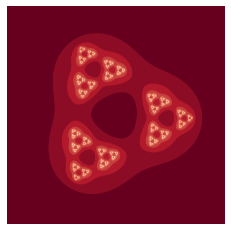

In [53]:
iters[iters == np.inf] = np.NINF
im = plt.imshow(iters,cmap=plt.cm.RdBu)
plt.axis("off")

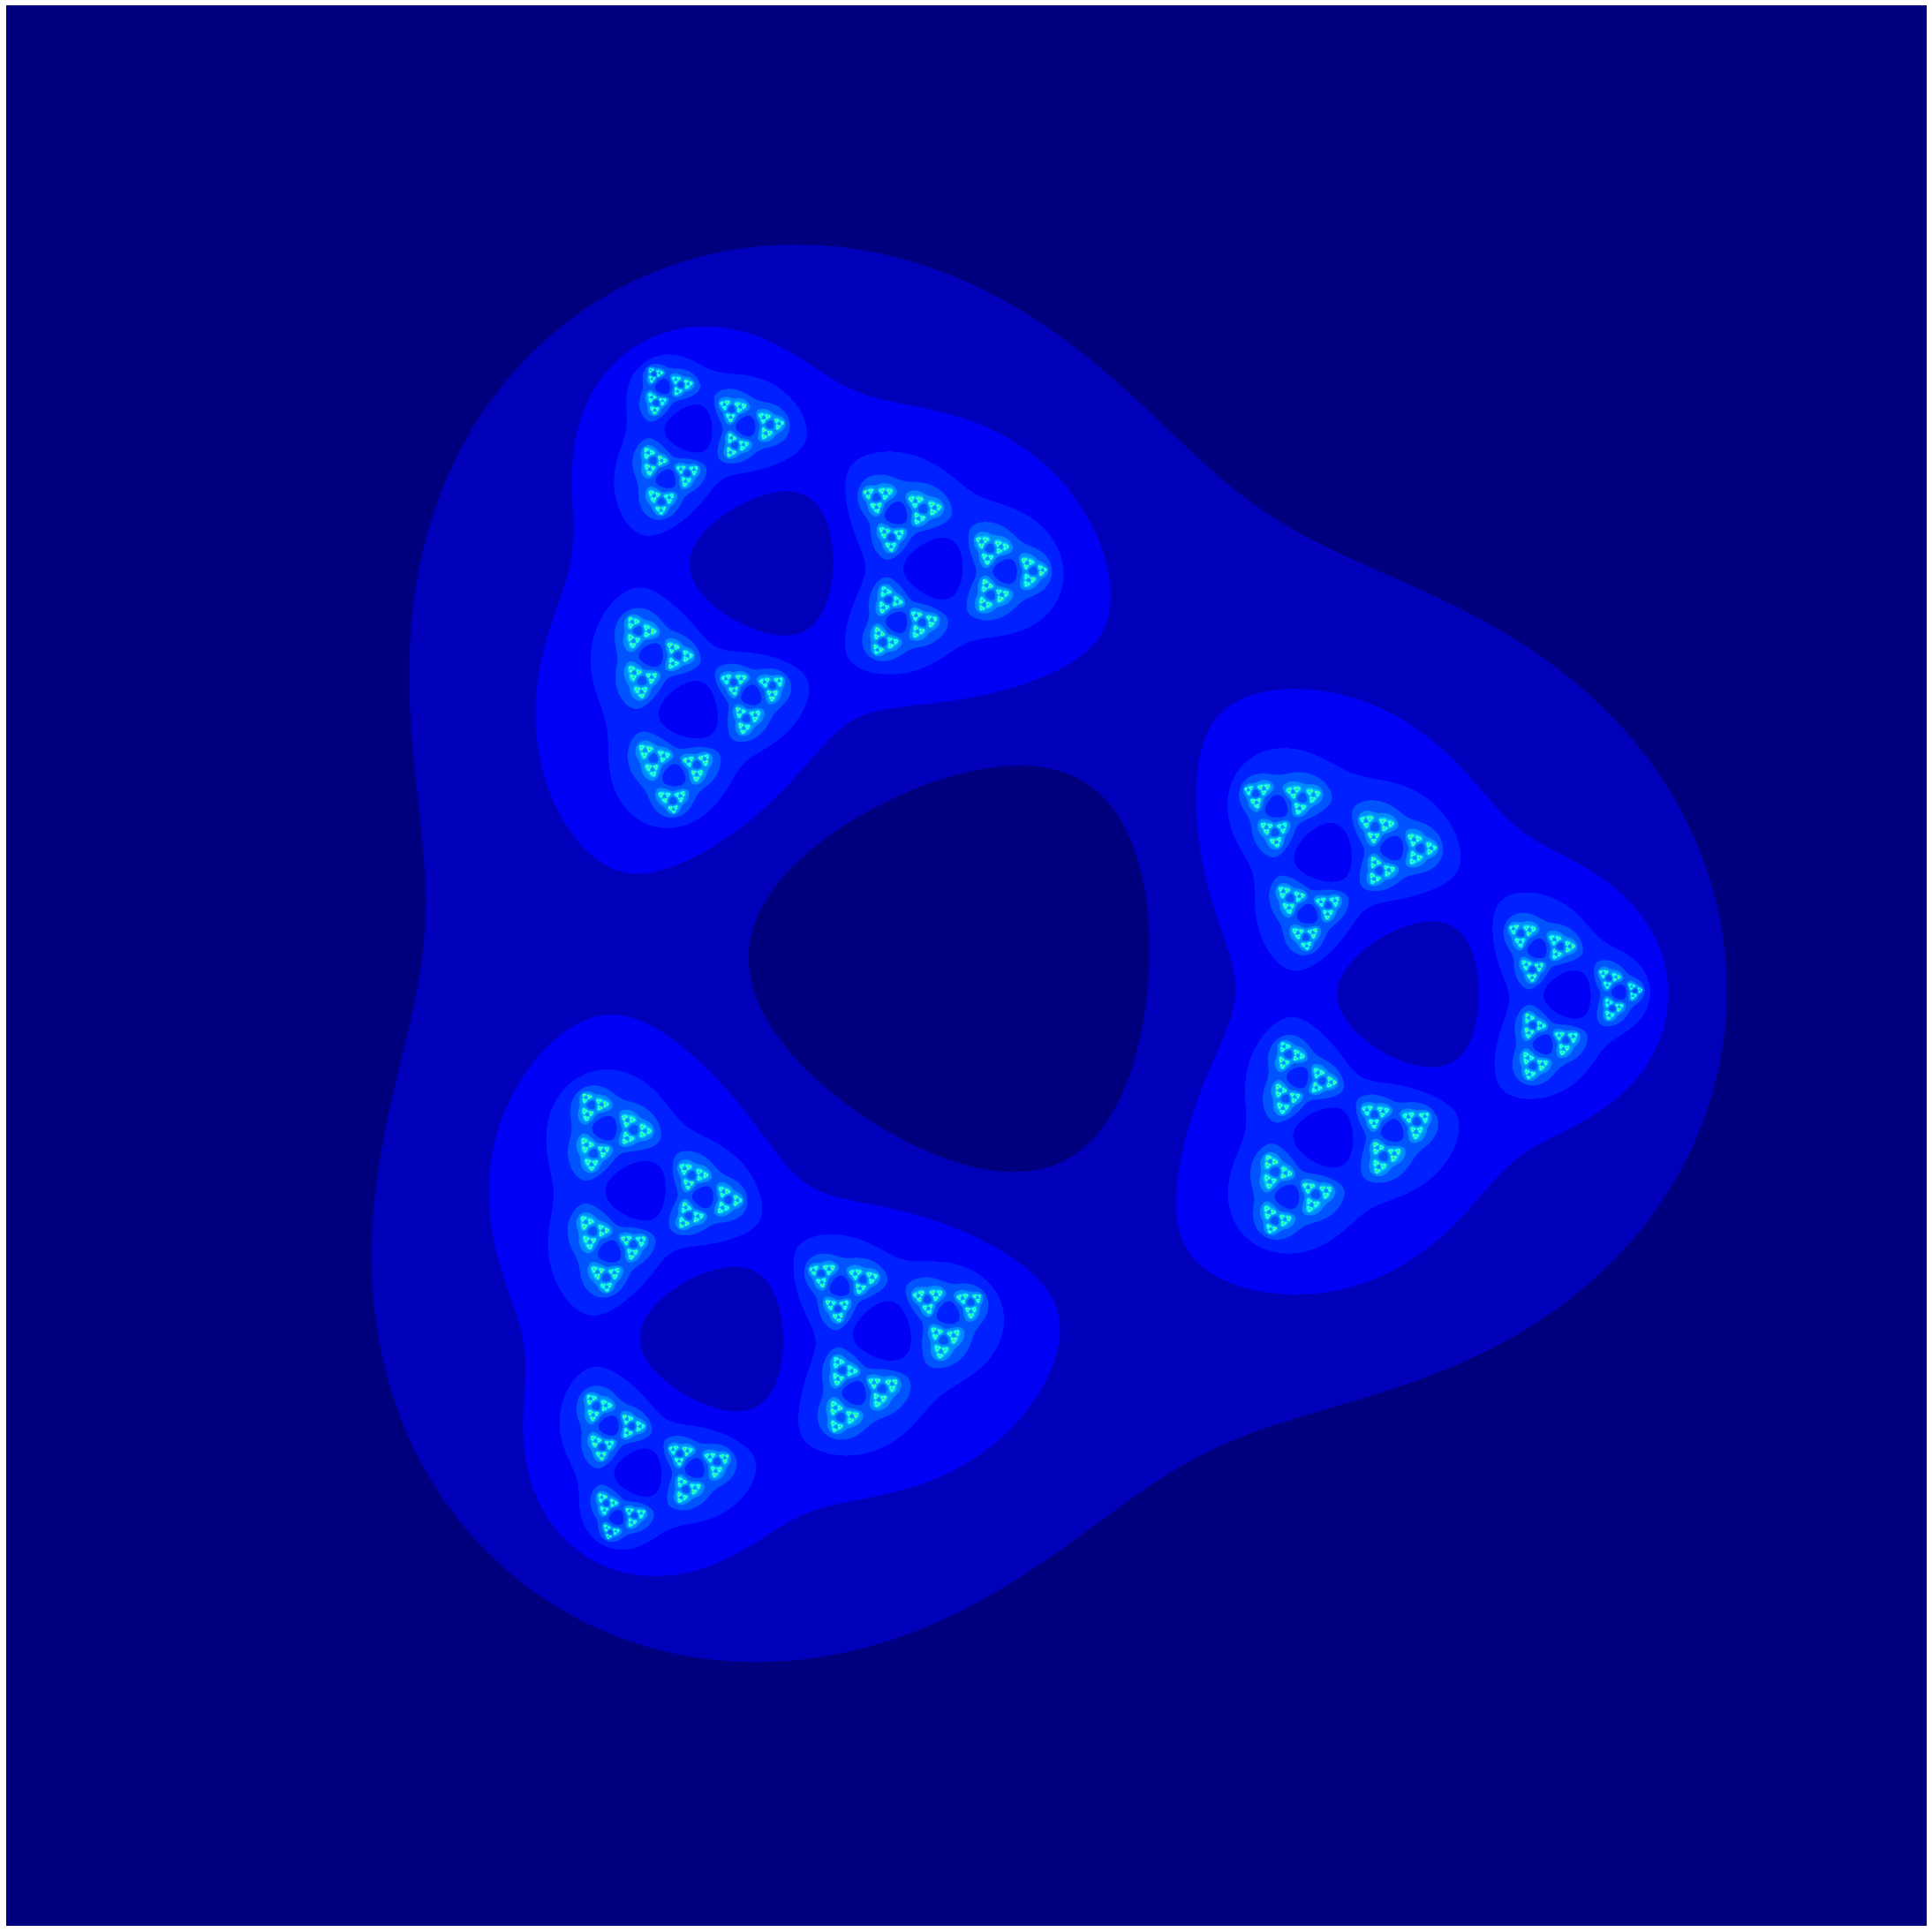

In [57]:
name = "zubieta_julia.png"

fig, ax = plt.subplots(figsize=(80, 40))
iters[iters == np.NINF] = np.max(iters)+100
ax.imshow(iters,cmap=plt.cm.jet)
plt.axis("off")
plt.plot()
plt.savefig("../images/"+name, bbox_inches='tight')

In [58]:
print(subprocess.check_output("cd ../sample_images && python3 reduce_size.py", shell=True, text=True))

saved image sierpinski_curve.jpeg
saved image dragon_curve.jpeg
saved image sierpinski_triangle.jpeg
saved image newton_fractal.jpeg
saved image cesaro_curve.jpeg
saved image koch_antisnowflake.jpeg
saved image zubieta_julia.jpeg
saved image levy_L_curve.jpeg
saved image buddhabrot.jpeg
saved image another_sierpinski_curve.jpeg
saved image peano_curve.jpeg
saved image koch_snowflake.jpeg
saved image sierpinski_carpet.jpeg
saved image twindragon_curve.jpeg
saved image mandelbrot.jpeg
saved image levy_standard_curve.jpeg
saved image koch_peano_curve.jpeg
saved image tribrot.jpeg
saved image julia.jpeg
saved image hilbert_curve.jpeg

